In [1]:
from mnist import MNIST
import warnings
warnings.filterwarnings("ignore")

In [2]:
from typing import Tuple
import chainer
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.datasets import mnist

Using TensorFlow backend.


In [15]:
import keras.backend as K
import pandas as pd
import random, os, math
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
from sklearn import preprocessing

## Read the dataset MINST

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train.shape, x_train.shape, y_test.shape, x_test.shape)

(60000,) (60000, 28, 28) (10000,) (10000, 28, 28)


In [31]:
print ("Train shape   :", x_train.shape)
print ("Test shape    :", x_test.shape)

Train shape   : (60000, 28, 28)
Test shape    : (10000, 28, 28)


## Merge the training and testing datasets into one single one big dataset.

In [5]:
x = np.concatenate((x_train, x_test), axis=0)

In [6]:
y = np.concatenate((y_train, y_test), axis=0)
Y = y.reshape((70000,1))

## Visualization of examples

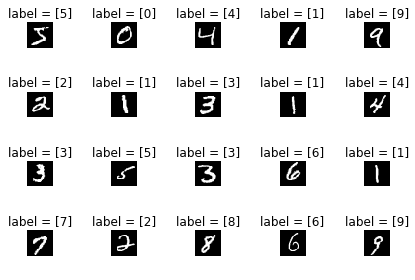

In [7]:
ROW = 4
COLUMN = 5
for i in range(ROW * COLUMN):
    #print (y.iloc[i].values[0])
    # train[i][0] is i-th image data with size 28x28
    image = x[i].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    plt.title('label = {}'.format(Y[i]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
#plt.savefig('mnist_plot.png')
plt.show()

In [8]:
# reshape the array x into a 2d for the fit function
nsamples, nx, ny = x.shape
X = x.reshape((nsamples,nx*ny))

In [9]:
def Random_Forest (x, y):
    # Split the data into 40% test and 60% training
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
    # Create a random forest classifier
    clf = RandomForestClassifier(max_depth=3, n_estimators=100, n_jobs=-1, random_state=0)
    # Train the classifier
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    return (cm)

In [10]:
confusion_matrix = Random_Forest (X, y)

In [11]:
confusion_matrix.reshape((10,10))

array([[2698,    1,    7,   10,    1,    0,   49,   21,   23,    2],
       [   1, 3128,   25,    3,    1,    0,    4,    8,    6,    3],
       [  87,  332, 2013,   42,   31,    0,  104,  123,   43,   12],
       [ 133,  273,   82, 2059,   19,    9,   18,   94,   33,   95],
       [  24,   40,   20,    5, 2129,    0,   93,   95,   16,  256],
       [ 327,  230,   29,  731,  131,  539,  112,  114,   92,  218],
       [ 137,  102,   70,   15,   78,    6, 2277,   39,   15,    1],
       [  29,  144,   65,    0,   42,    0,    3, 2550,   11,   83],
       [  47,  567,  109,  154,   39,    6,   77,   42, 1519,  156],
       [  30,   84,   34,   39,  236,    0,   32,  383,   30, 1955]],
      dtype=int64)

In [12]:
mc = np.zeros((10, 10))
for j in range(0,10):
    for k in range(0,10):
        mc[j][k] = confusion_matrix[j][k]+confusion_matrix[k][j]

In [13]:
mc.astype(int)

array([[5396,    2,   94,  143,   25,  327,  186,   50,   70,   32],
       [   2, 6256,  357,  276,   41,  230,  106,  152,  573,   87],
       [  94,  357, 4026,  124,   51,   29,  174,  188,  152,   46],
       [ 143,  276,  124, 4118,   24,  740,   33,   94,  187,  134],
       [  25,   41,   51,   24, 4258,  131,  171,  137,   55,  492],
       [ 327,  230,   29,  740,  131, 1078,  118,  114,   98,  218],
       [ 186,  106,  174,   33,  171,  118, 4554,   42,   92,   33],
       [  50,  152,  188,   94,  137,  114,   42, 5100,   53,  466],
       [  70,  573,  152,  187,   55,   98,   92,   53, 3038,  186],
       [  32,   87,   46,  134,  492,  218,   33,  466,  186, 3910]])

## G is a graph presentation of colectiv confusion_matrix

In [16]:
G = nx.from_numpy_matrix(mc) # convert to graph
most_confusable = nx.maximum_spanning_tree(G) # calc maximum spanning tree 

## greedy_color
Color a graph using various strategies of greedy graph coloring.
Attempts to color a graph using as few colors as possible, 
where no neighbours of a node can have same color as the node itself. 
The given strategy determines the order in which nodes are colored.

In [17]:
d = nx.coloring.greedy_color(most_confusable, strategy='largest_first') # We then two-color this tree so that no adjacent nodes have the same color 

### Let as set 0 for “normal” and 1 for “anomalous” acording to d

In [18]:
accordingnormal_classes = []
anomalous_classes = []
for key, value in d.items():
    if value == 0:
        normal_classes.append(key)
    else:
        anomalous_classes.append(key)

## Data cleaning

In [19]:
X_df = pd.DataFrame(X)

In [20]:
# deleting empty columns
X_df.info() # to fined emty data
X_df.dropna(axis='columns', how="all", inplace=True)
# deleting empty row
X_df.dropna(how="all", inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 52.3 MB


## Scaling features to a range

In [21]:
min_max_scaler = preprocessing.MinMaxScaler()
X_df_minmax = min_max_scaler.fit_transform(X_df)

In [22]:
X_minmax_df = pd.DataFrame(X_df_minmax)

In [23]:
# adding the Label
S = np.concatenate((X_minmax_df, Y), axis=1)

In [24]:
# converting numpay array to Pandas DataFrame
df = pd.DataFrame(S)

In [25]:
df = df.rename(columns={784: 'Label'})

In [26]:
anomalous_classes_df = df.copy()
# anomalous_classes DataFrame 
for i in normal_classes:
    anomalous_classes_df.drop(df[df['Label'] == i].index, inplace=True)
    anomalous_classes_df = pd.DataFrame(anomalous_classes_df)

In [27]:
# randomly select 5% of the anomalous_classes 
anomalous_classes_df = anomalous_classes_df.sample(frac=0.05, random_state=1)

In [28]:
normal_classes_df = df.copy()
# normal_classes DataFrame 
for i in anomalous_classes:
    normal_classes_df.drop(df[df['Label'] == i].index, inplace=True)
    normal_classes_df = pd.DataFrame(normal_classes_df)

In [29]:
# Save to file 
normal_classes_df.to_csv('normal_classes_df.csv', index = None, header=True)
anomalous_classes_df.to_csv('outliers_classes_df.csv', index = None, header=True)